In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 5.1

In [3]:
df = pd.read_csv("M&M.csv").filter(['Date', 'Close Price'])

In [4]:
df = df.set_index('Date')
df['day_perc_change'] = df['Close Price'].pct_change().values

In [5]:
df = df.dropna()

In [8]:
daily_std = df['day_perc_change'].std()
annual_std = daily_std * np.sqrt(252)

daily_mean = df['day_perc_change'].mean()
annual_mean = daily_mean * 252

print(f"Annual Returns: {annual_mean:.3f}")
print(f"Annual SD/Volatility: {annual_std:.3f}")

Annual Returns: -0.271
Annual SD/Volatility: 0.439


# 5.2

#### Creating diverse portfolio

Stocks choosen: M&M, BPCL, HDFC, RELIANCE, TITAN

In [18]:
df_1 = pd.read_csv("M&M.csv").filter(['Date','Close Price']).set_index('Date')
df_2 = pd.read_csv("BPCL.csv").filter(['Date','Close Price']).set_index('Date')
df_3 = pd.read_csv("BAJFINANCE.csv").filter(['Date','Close Price']).set_index('Date')
df_4 = pd.read_csv("RELIANCE.csv").filter(['Date','Close Price']).set_index('Date')
df_5 = pd.read_csv("TITAN.csv").filter(['Date','Close Price']).set_index('Date')
df_list = [df_1, df_2, df_3, df_4, df_5] # create a list of all 5 stocks

#### Calculating volatility and returns of all stocks

In [22]:
std_annual = []
returns = []

for df in df_list:
    df = df.dropna()
    df['day_perc_change'] = df['Close Price'].pct_change().values
    std_annual.append(df['day_perc_change'].std() * np.sqrt(252))
    returns.append(df['day_perc_change'].mean() * 252)
    
for i in range(len(df_list)):
    print(f"--Stock {i+1}--")
    print(f"Returns: {returns[i]}")
    print(f"Volatility: {std_annual[i]}")
    print("="*40)

--Stock 1--
Returns: -0.270753402956234
Volatility: 0.4392344553248365
--Stock 2--
Returns: -0.26089058018286193
Volatility: 0.4359818640737126
--Stock 3--
Returns: 0.45341250002156
Volatility: 0.3207352726745621
--Stock 4--
Returns: 0.08714096778575382
Volatility: 0.43878757052425593
--Stock 5--
Returns: 0.4896091375608653
Volatility: 0.32419156297801527


#### Calculating volatility of entire portfolio

In [20]:
print("--Assuming equal weights for all stocks--")
q = [0.2*x for x in std_annual]
print(f'Portfolio Returns =  {sum(q)}')
p = [(0.2 * x)**2 for x in std_annual]
print(f'Portfolio Volatality = {sum(p)**0.5}')

--Assuming equal weights for all stocks--
Portfolio Returns =  0.39178614511507653
Portfolio Volatality = 0.17703252912795753


# 5.3 - 5.4

#### Returns and Volatality for various weight combinations

In [30]:
highest_return = -1
lowest_volatality = 1
rtn_vals, volty_vals, sharpe_ratio = [], [], []
for i in range(3000):
    k = np.random.dirichlet(np.ones(5),size=1)
    p = (std_annual * k)**2
    q = returns * k
    ret = q.sum()
    vol = p.sum()
    
    rtn_vals.append(ret)
    volty_vals.append(vol)
    sharpe_ratio.append(ret/vol)
    
    if ret > highest_return:   # getting highest return portfolio
        highest_return = ret
        corresponding_vol = vol
        
    if vol < lowest_volatality:  # to get lowest volatality portfolio
        lowest_volatality = vol
        corresponding_ret = ret

#### Plotting data and marking highest return & lowest volatility

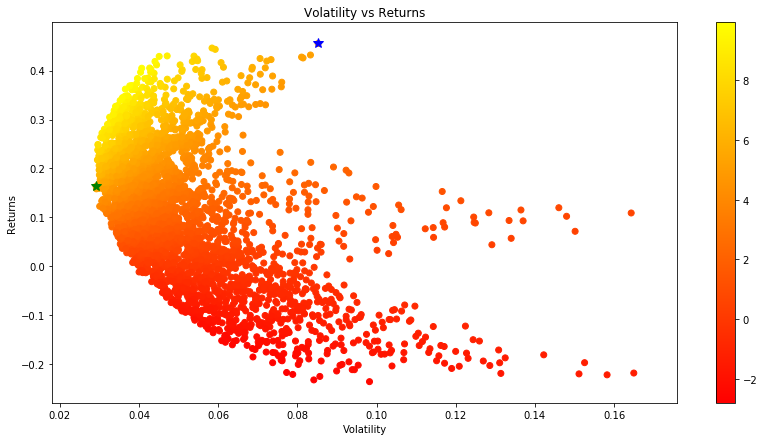

In [84]:
plt.figure(figsize=(14,7))
plt.scatter(volty_vals, rtn_vals, cmap=plt.cm.autumn, c=sharpe_ratio)
plt.colorbar()
plt.plot(corresponding_vol,highest_return,marker='*',color = 'blue',markersize=10)
plt.plot(lowest_volatality,corresponding_ret,marker='*',color = 'green',markersize=10)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Volatility vs Returns')
plt.show()